<a href="https://colab.research.google.com/github/VasaniVishal0/Statistics-for-Decision-Making/blob/main/Statistics_for_Decision_Making_%E2%80%93_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import drive, files


# 1) Mount Google Drive
print("Mounting Google Drive...")
try:
    drive.mount('/content/drive', force_remount=False)
    print("Drive mounted at /content/drive")
except Exception as e:
    print("Drive mount failed or skipped:", e)

# 2) Try to load CSV from Drive path (if present), otherwise prompt for upload
csv_path = None
if os.path.exists(drive_csv_path):
    csv_path = drive_csv_path
    print(f"Found CSV on Drive: {csv_path}")
else:
    print(f"CSV not found at Drive path: {drive_csv_path}")

if csv_path is None:
    print("\nPlease upload 'property.csv' using the file picker dialog.")
    uploaded = files.upload()
    if not uploaded:
        raise SystemExit("No file uploaded. Re-run this cell and upload property.csv.")
    # take the first uploaded file
    csv_path = next(iter(uploaded.keys()))
    print(f"Uploaded file: {csv_path}")

# 3) Load into a DataFrame
print("\nLoading CSV into DataFrame...")
try:
    df = pd.read_csv(csv_path)
except Exception as e:
    # try with latin-1 encoding as fallback
    try:
        df = pd.read_csv(csv_path, encoding='latin-1')
    except Exception as e2:
        raise RuntimeError(f"Failed to read CSV: {e}\nFallback failed: {e2}")

print("Loaded. DataFrame shape:", df.shape)
# quick preview
display(df.head())
print("\nColumns detected:", list(df.columns))

# handy lowercase -> actual column name map for later cells
cols_map = {c.lower().strip(): c for c in df.columns}
print("\nYou can access columns robustly later with the helper 'cols_map'. Example:", cols_map.get('price', 'price not found'))


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted at /content/drive
CSV not found at Drive path: /content/drive/MyDrive/property.csv

Please upload 'property.csv' using the file picker dialog.


Saving property.csv to property.csv
Uploaded file: property.csv

Loading CSV into DataFrame...
Loaded. DataFrame shape: (13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0



Columns detected: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

You can access columns robustly later with the helper 'cols_map'. Example: Price


Found 74 property records for suburb: Altona

--- Hypothesis Test Results ---
Sample size (n): 74
Sample mean: $834,830.41
Sample std deviation: $291,546.05
t-statistic: 1.0277
One-tailed p-value: 0.153742

 Conclusion: Fail to reject H₀ at α = 0.05
 No significant evidence that the average price in Altona exceeds $800,000.


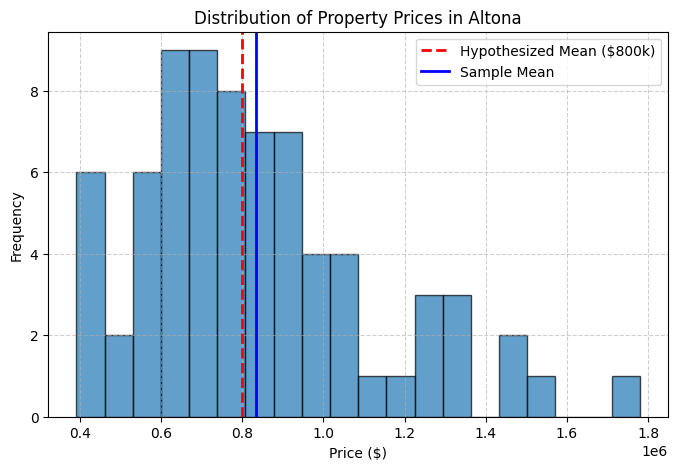

In [5]:
# -----------------------------
#Question 1: Hypothesis Test for Altona Suburb
# -----------------------------

# --- Step 1: Identify the relevant columns ---
price_col = cols_map.get('price', None)
suburb_col = cols_map.get('suburb', None)

if not price_col or not suburb_col:
    raise KeyError("Missing required columns 'Price' or 'Suburb' in dataset.")

# --- Step 2: Filter dataset for Altona suburb ---
altona_df = df[df[suburb_col].astype(str).str.strip().str.lower() == 'altona']
altona_prices = altona_df[price_col].dropna().astype(float)

print(f"Found {len(altona_prices)} property records for suburb: Altona")

# --- Step 3: One-sample t-test ---
# H0: μ = 800000
# H1: μ > 800000
mu_0 = 800000  # hypothesized mean
alpha = 0.05

if len(altona_prices) < 2:
    print("Not enough data points in Altona to perform a t-test.")
else:
    from scipy.stats import ttest_1samp

    t_stat, p_val_two_tailed = ttest_1samp(altona_prices, mu_0)
    # Convert to one-tailed p-value for H1: μ > 800000
    if t_stat > 0:
        p_val_one_tailed = p_val_two_tailed / 2
    else:
        p_val_one_tailed = 1 - (p_val_two_tailed / 2)

    # --- Step 4: Display results ---
    print("\n--- Hypothesis Test Results ---")
    print(f"Sample size (n): {len(altona_prices)}")
    print(f"Sample mean: ${altona_prices.mean():,.2f}")
    print(f"Sample std deviation: ${altona_prices.std(ddof=1):,.2f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"One-tailed p-value: {p_val_one_tailed:.6f}")

    # --- Step 5: Statistical conclusion ---
    if p_val_one_tailed < alpha:
        print(f"\n Conclusion: Reject H₀ at α = {alpha}")
        print(" Evidence suggests the average price in Altona has increased above $800,000.")
    else:
        print(f"\n Conclusion: Fail to reject H₀ at α = {alpha}")
        print(" No significant evidence that the average price in Altona exceeds $800,000.")

# --- Step 6: Visualize the distribution ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(altona_prices, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mu_0, color='red', linestyle='--', linewidth=2, label='Hypothesized Mean ($800k)')
plt.axvline(altona_prices.mean(), color='blue', linestyle='-', linewidth=2, label='Sample Mean')
plt.title("Distribution of Property Prices in Altona")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Winter data points: 1388
Summer data points: 1084

--- Two-Sample t-Test Results (2016: Winter vs Summer) ---
Winter Mean Price: $1,144,211.79
Summer Mean Price: $1,020,054.34
t-statistic: 4.7382
p-value: 0.000002

Conclusion: Reject H₀ at α = 0.05
There is a statistically significant difference between winter and summer prices in 2016.


/tmp/ipython-input-3738358614.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([winter_prices, summer_prices], labels=['Winter (Oct-Mar)', 'Summer (Apr-Sep)'])


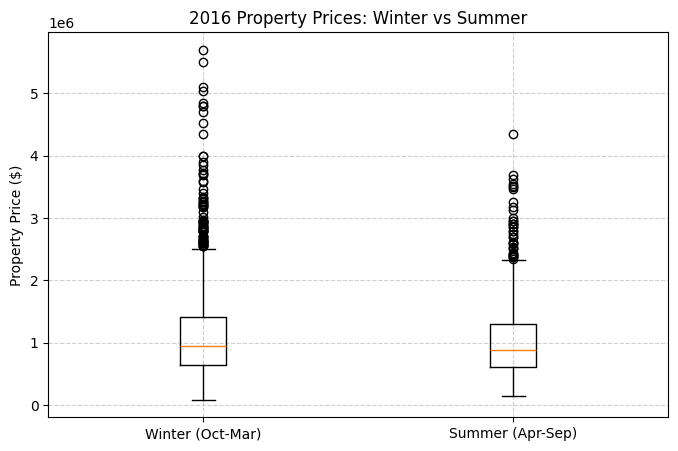

In [6]:
# -----------------------------
# Question 2: Seasonal Price Comparison (2016)
# -----------------------------

# Step 1: Identify date and price columns
price_col = cols_map.get('price', None)
date_col = cols_map.get('date', None)

if not price_col or not date_col:
    raise KeyError("Missing required columns 'Price' or 'Date' in dataset.")

# Step 2: Convert Date column to datetime format
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Step 3: Filter for the year 2016
df_2016 = df[df[date_col].dt.year == 2016].copy()
if df_2016.empty:
    print("No records found for the year 2016 in the dataset.")
else:
    # Step 4: Define winter and summer months
    winter_months = [10, 11, 12, 1, 2, 3]
    df_2016['Month'] = df_2016[date_col].dt.month

    # Separate data
    winter_prices = df_2016[df_2016['Month'].isin(winter_months)][price_col].dropna().astype(float)
    summer_prices = df_2016[~df_2016['Month'].isin(winter_months)][price_col].dropna().astype(float)

    print(f"Winter data points: {len(winter_prices)}")
    print(f"Summer data points: {len(summer_prices)}")

    # Step 5: Perform two-sample t-test (Welch's test, unequal variances)
    if len(winter_prices) < 2 or len(summer_prices) < 2:
        print("Not enough observations in one of the groups to perform t-test.")
    else:
        from scipy.stats import ttest_ind

        t_stat, p_val = ttest_ind(winter_prices, summer_prices, equal_var=False, nan_policy='omit')

        print("\n--- Two-Sample t-Test Results (2016: Winter vs Summer) ---")
        print(f"Winter Mean Price: ${winter_prices.mean():,.2f}")
        print(f"Summer Mean Price: ${summer_prices.mean():,.2f}")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.6f}")

        alpha = 0.05
        if p_val < alpha:
            print(f"\nConclusion: Reject H₀ at α = {alpha}")
            print("There is a statistically significant difference between winter and summer prices in 2016.")
        else:
            print(f"\nConclusion: Fail to reject H₀ at α = {alpha}")
            print("There is no statistically significant difference between winter and summer prices in 2016.")

        # Step 6: Visualize comparison using boxplot
        import matplotlib.pyplot as plt

        plt.figure(figsize=(8,5))
        plt.boxplot([winter_prices, summer_prices], labels=['Winter (Oct-Mar)', 'Summer (Apr-Sep)'])
        plt.title("2016 Property Prices: Winter vs Summer")
        plt.ylabel("Property Price ($)")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


Total properties in Abbotsford: 56
Properties without car parking: 15
Estimated probability (p) of no car parking: 0.268

--- Probability Calculation ---
n = 10, k = 3
P(X = 3) = 0.260053
Rounded probability: 0.260


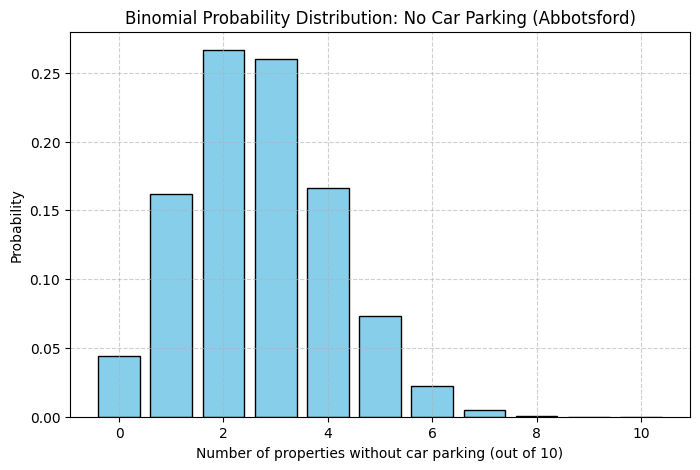

In [7]:
# -----------------------------
# Question 3: Probability of 3 out of 10 properties without car parking (Abbotsford)
# -----------------------------

from math import comb

# Step 1: Identify required columns
suburb_col = cols_map.get('suburb', None)
car_col = cols_map.get('car', None)

if not suburb_col or not car_col:
    raise KeyError("Missing required columns 'Suburb' or 'Car' in dataset.")

# Step 2: Filter data for Abbotsford
abbotsford_df = df[df[suburb_col].astype(str).str.strip().str.lower() == 'abbotsford']
if abbotsford_df.empty:
    print("No records found for suburb: Abbotsford")
else:
    # Step 3: Calculate probability of property having no car parking
    total_props = len(abbotsford_df)
    no_car_props = (abbotsford_df[car_col] == 0).sum()
    p_no_car = no_car_props / total_props

    print(f"Total properties in Abbotsford: {total_props}")
    print(f"Properties without car parking: {no_car_props}")
    print(f"Estimated probability (p) of no car parking: {p_no_car:.3f}")

    # Step 4: Compute probability that exactly 3 out of 10 have no car parking
    n = 10
    k = 3
    prob_exact_3 = comb(n, k) * (p_no_car ** k) * ((1 - p_no_car) ** (n - k))

    print("\n--- Probability Calculation ---")
    print(f"n = {n}, k = {k}")
    print(f"P(X = 3) = {prob_exact_3:.6f}")
    print(f"Rounded probability: {prob_exact_3:.3f}")

    # Step 5: Visualize the probability distribution for 0–10 no-car properties
    import matplotlib.pyplot as plt

    probs = [comb(n, x) * (p_no_car ** x) * ((1 - p_no_car) ** (n - x)) for x in range(11)]
    plt.figure(figsize=(8,5))
    plt.bar(range(11), probs, color='skyblue', edgecolor='black')
    plt.title("Binomial Probability Distribution: No Car Parking (Abbotsford)")
    plt.xlabel("Number of properties without car parking (out of 10)")
    plt.ylabel("Probability")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


Total properties in Abbotsford: 56
Properties with 3 rooms: 20
Probability of finding a property with 3 rooms: 0.357


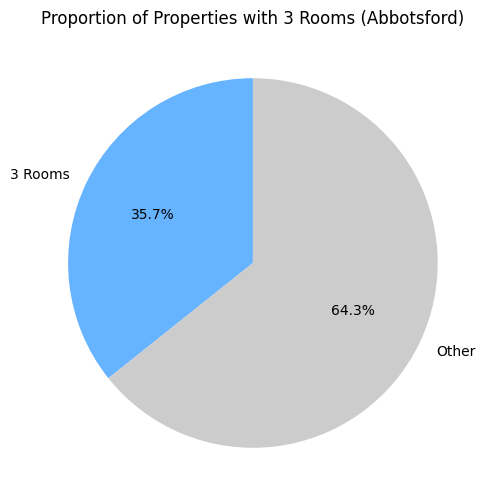

In [8]:
# -----------------------------
# Question 4: Probability of finding a property with 3 rooms (Abbotsford)
# -----------------------------

# Step 1: Identify the required columns
suburb_col = cols_map.get('suburb', None)
rooms_col = cols_map.get('rooms', None)

if not suburb_col or not rooms_col:
    raise KeyError("Missing required columns 'Suburb' or 'Rooms' in dataset.")

# Step 2: Filter for Abbotsford suburb
abbotsford_df = df[df[suburb_col].astype(str).str.strip().str.lower() == 'abbotsford']

if abbotsford_df.empty:
    print("No records found for suburb: Abbotsford.")
else:
    # Step 3: Calculate probability of having 3 rooms
    total_props = len(abbotsford_df)
    props_with_3_rooms = (abbotsford_df[rooms_col] == 3).sum()
    p_3_rooms = props_with_3_rooms / total_props

    print(f"Total properties in Abbotsford: {total_props}")
    print(f"Properties with 3 rooms: {props_with_3_rooms}")
    print(f"Probability of finding a property with 3 rooms: {p_3_rooms:.3f}")

    # Step 4: Simple visualization (Pie chart)
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,6))
    plt.pie(
        [props_with_3_rooms, total_props - props_with_3_rooms],
        labels=["3 Rooms", "Other"],
        autopct='%1.1f%%',
        colors=["#66b3ff", "#cccccc"],
        startangle=90
    )
    plt.title("Proportion of Properties with 3 Rooms (Abbotsford)")
    plt.show()


Total properties in Abbotsford: 56
Properties with 2 bathrooms: 19
Probability of finding a property with 2 bathrooms: 0.339


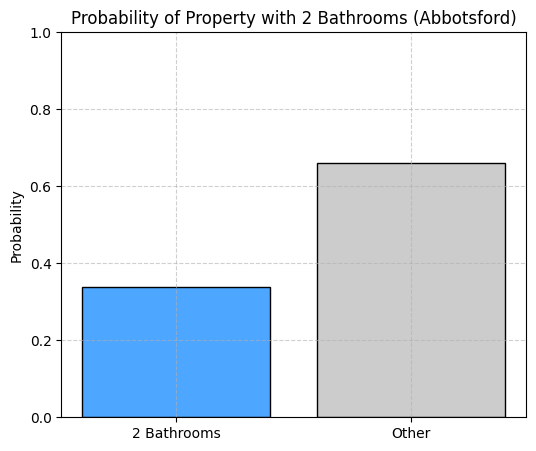

In [9]:
# -----------------------------
# Question 5: Probability of finding a property with 2 bathrooms (Abbotsford)
# -----------------------------

# Step 1: Identify the required columns
suburb_col = cols_map.get('suburb', None)
bathroom_col = cols_map.get('bathroom', None)

if not suburb_col or not bathroom_col:
    raise KeyError("Missing required columns 'Suburb' or 'Bathroom' in dataset.")

# Step 2: Filter for Abbotsford suburb
abbotsford_df = df[df[suburb_col].astype(str).str.strip().str.lower() == 'abbotsford']

if abbotsford_df.empty:
    print("No records found for suburb: Abbotsford.")
else:
    # Step 3: Calculate probability of having 2 bathrooms
    total_props = len(abbotsford_df)
    props_with_2_baths = (abbotsford_df[bathroom_col] == 2).sum()
    p_2_baths = props_with_2_baths / total_props

    print(f"Total properties in Abbotsford: {total_props}")
    print(f"Properties with 2 bathrooms: {props_with_2_baths}")
    print(f"Probability of finding a property with 2 bathrooms: {p_2_baths:.3f}")

    # Step 4: Visualize with a bar chart
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.bar(["2 Bathrooms", "Other"], [p_2_baths, 1 - p_2_baths], color=["#4da6ff", "#cccccc"], edgecolor='black')
    plt.title("Probability of Property with 2 Bathrooms (Abbotsford)")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
